In [16]:
from PIL import Image
from PIL.ExifTags import TAGS

image_path = "/Our Heritage.jpg"

try:
    image = Image.open(image_path)
    exif_data = image._getexif()

    if exif_data:
        for tag_id, value in exif_data.items():
            tag = TAGS.get(tag_id, tag_id)
            print(f"{tag}: {value}")
    else:
        print("No EXIF data found in this image.")
except Exception as e:
    print(f"Error: {e}")


ImageWidth: 1280
ImageLength: 863
ExifOffset: 94
DateTime: 2022:10:17 07:35:27
Orientation: 1
ExifImageWidth: 1280
ExifImageHeight: 863


Saving me.jpg to me (2).jpg
Hidden image saved as hidden.png
Extracted image saved as extracted.png


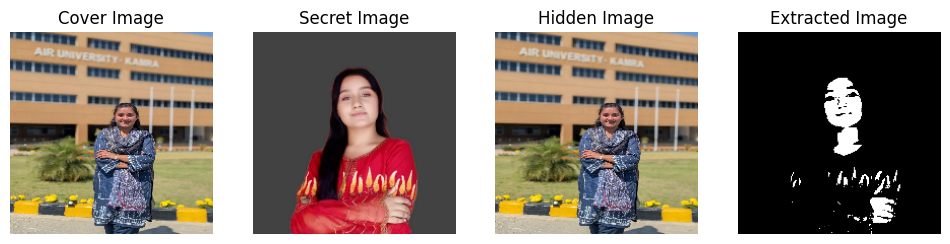

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload images
uploaded = files.upload()

# Function to hide the secret image inside the cover image
def hide_image(cover_path, secret_path, output_path):
    cover = cv2.imread(cover_path)
    secret = cv2.imread(secret_path)

    if cover is None or secret is None:
        print("Error: One or both images could not be loaded.")
        return

    # Resize secret image to match cover
    secret = cv2.resize(secret, (cover.shape[1], cover.shape[0]))

    # Encode by modifying LSB
    hidden = cover.copy()
    hidden[:, :, 0] = (cover[:, :, 0] & 0xFE) | (secret[:, :, 0] >> 7)

    cv2.imwrite(output_path, hidden)
    print(f"Hidden image saved as {output_path}")

# Function to extract the hidden image
def extract_image(hidden_path, output_path):
    hidden = cv2.imread(hidden_path)

    if hidden is None:
        print("Error: Hidden image could not be loaded.")
        return

    extracted = (hidden[:, :, 0] & 1) * 255
    cv2.imwrite(output_path, extracted)
    print(f"Extracted image saved as {output_path}")

# Paths
cover_image = "me.jpg"
secret_image = "tabia.jpg"
hidden_image = "hidden.png"
extracted_image = "extracted.png"

# Hide and Extract
hide_image(cover_image, secret_image, hidden_image)
extract_image(hidden_image, extracted_image)

# Load images for display
cover = cv2.imread(cover_image)
secret = cv2.imread(secret_image)
hidden = cv2.imread(hidden_image)
extracted = cv2.imread(extracted_image)

# Convert images from BGR to RGB for matplotlib
cover = cv2.cvtColor(cover, cv2.COLOR_BGR2RGB)
secret = cv2.cvtColor(secret, cv2.COLOR_BGR2RGB)
hidden = cv2.cvtColor(hidden, cv2.COLOR_BGR2RGB)
extracted = cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB)

# Resize all images for display
resize_dim = (200, 200)
cover = cv2.resize(cover, resize_dim)
secret = cv2.resize(secret, resize_dim)
hidden = cv2.resize(hidden, resize_dim)
extracted = cv2.resize(extracted, resize_dim)

# Display images in one row
plt.figure(figsize=(12, 4))
titles = ["Cover Image", "Secret Image", "Hidden Image", "Extracted Image"]
images = [cover, secret, hidden, extracted]

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.show()



Please upload the Cover and Secret Images:


Saving rcar.jpg to rcar.jpg
Saving bcar.jpg to bcar.jpg
✅ Hidden image saved as hidden.png
✅ Extracted image saved as extracted.png


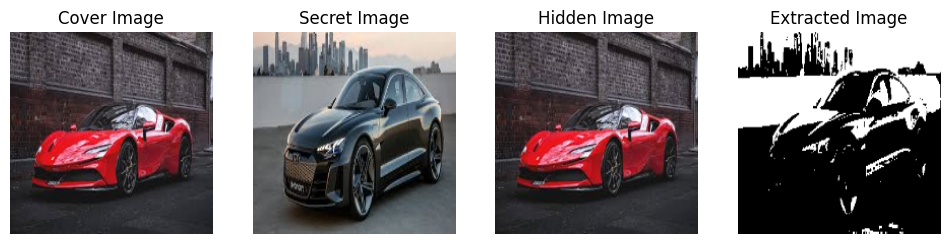

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload images
print("Please upload the Cover and Secret Images:")
uploaded = files.upload()

# Get filenames
image_files = list(uploaded.keys())
if len(image_files) < 2:
    print("Error: Please upload two images!")
else:
    cover_path, secret_path = image_files[0], image_files[1]

    # Function to hide the secret image inside the cover image
    def hide_image(cover_path, secret_path, output_path="hidden.png"):
        cover = cv2.imread(cover_path)
        secret = cv2.imread(secret_path)

        if cover is None or secret is None:
            print("Error: One or both images could not be loaded.")
            return

        # Resize secret image to match cover
        secret = cv2.resize(secret, (cover.shape[1], cover.shape[0]))

        # Encode by modifying LSB
        hidden = cover.copy()
        hidden[:, :, 0] = (cover[:, :, 0] & 0xFE) | (secret[:, :, 0] >> 7)

        cv2.imwrite(output_path, hidden)
        print(f"✅ Hidden image saved as {output_path}")

    # Function to extract the hidden image
    def extract_image(hidden_path="hidden.png", output_path="extracted.png"):
        hidden = cv2.imread(hidden_path)

        if hidden is None:
            print("Error: Hidden image could not be loaded.")
            return

        extracted = (hidden[:, :, 0] & 1) * 255
        cv2.imwrite(output_path, extracted)
        print(f"✅ Extracted image saved as {output_path}")

    # Hide the image
    hide_image(cover_path, secret_path)

    # Extract the hidden image
    extract_image()

    # Load images for display
    cover = cv2.imread(cover_path)
    secret = cv2.imread(secret_path)
    hidden = cv2.imread("hidden.png")
    extracted = cv2.imread("extracted.png")

    # Convert images from BGR to RGB for correct color display
    cover = cv2.cvtColor(cover, cv2.COLOR_BGR2RGB)
    secret = cv2.cvtColor(secret, cv2.COLOR_BGR2RGB)
    hidden = cv2.cvtColor(hidden, cv2.COLOR_BGR2RGB)
    extracted = cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB)

    # Resize all images for display
    resize_dim = (200, 200)
    cover = cv2.resize(cover, resize_dim)
    secret = cv2.resize(secret, resize_dim)
    hidden = cv2.resize(hidden, resize_dim)
    extracted = cv2.resize(extracted, resize_dim)

    # Display images in one row
    plt.figure(figsize=(12, 4))
    titles = ["Cover Image", "Secret Image", "Hidden Image", "Extracted Image"]
    images = [cover, secret, hidden, extracted]

    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")

    plt.show()
